In [1]:
import os
import numpy as np
np.random.seed(420)
from IPython.display import HTML

from HMM import unsupervised_HMM, from_hmm
from HMM_helper import (
    parse_seqs,
    parse_text,
    update_syll_map,
    sample_sentence,
    visualize_sparsities,
    rhyme_dict_gen
)

In [2]:
with open(os.path.join(os.getcwd(), 'data/shakespeare.txt'), 'r') as f:
    text = f.read()

with open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt'), 'r') as f:
    syll_map0 = {}
    for i, line in enumerate(f):
        line = line.strip().split()
        word = line[0] 
        # Add 10 to denote end of line syll_count
        sylls = np.array([int(s.replace('E', '1')) for s in line[1:]])
        assert(word not in syll_map0)
        syll_map0[word] = sylls

In [3]:
seqs = parse_text(text, by='line')
obs, obs_map = parse_seqs(seqs)
syll_map = update_syll_map(syll_map0, obs_map)
rhyme_d = rhyme_dict_gen(text, connected=False, with_words=False)

In [4]:
hmm8 = unsupervised_HMM(obs, 10, 5)

100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


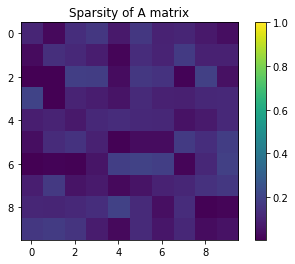

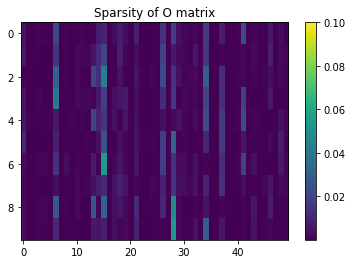

In [5]:
visualize_sparsities(hmm8, O_max_cols=50)

In [6]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
For the me the weep as now but who desert or who i thou of ere your outward time my then most soul was pierced...


In [7]:
shmm = from_hmm(hmm8, obs_map, syll_map, rhyme_d)
print(shmm.generate_sonnet(do_syll=True, do_rhyme=True))

Yet himself will doth love thy flatter have,
End all thou be my and are to the style,
In shun anticipate thee ill his grave,
And heir for watchman your sin am compile,
Their both art my but and leaves which should on,
Prove than this sinful which by a may true,
Jewel potions wrong of most eased could gone,
Are your my steal sums which think prime but you,
By heart crime fell so blot from summer's wrought,
Their i a by and love well to with thee,
Still thrust thou alone thine or o here thought,
I truly confined object vice but thee,
Life give to which are is and largess i,
Mine of cries on is themselves when then be,
